In [85]:
# Cell #1
# Code from the link below is used as a base for image classification
# https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/
# Evaluating models on the cifar10 dataset
import sys
from matplotlib import pyplot
import pandas as pd
import numpy as np
from keras.datasets import cifar10
#from keras.utils import to_categorical
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
#from keras.optimizers import SGD
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load train and test dataset
def load_dataset():
	# load dataset
	(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
	# one hot encode target values
	#Y_train_Ctg = np_utils.to_categorical(Y_train)
	#Y_test_Ctg = np_utils.to_categorical(Y_test)
	return X_train, Y_train, X_test, Y_test #, Y_train_Ctg, Y_test_Ctg

# pixel Normalization
def normalize_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()

# Plot learning and validation graph
def validation_graph(history):
    history_dict = history.history
    history_dict.keys()
    pd.DataFrame(history_dict).plot(figsize=(10,6))
    pyplot.grid(True)
    pyplot.gca().set_ylim(0, 2)
    pyplot.title('Accuracy and loss for both training and validation', fontsize=16)
    pyplot.xlabel('Epochs', fontsize=16)
    pyplot.ylabel('Accuracy and loss percentage', rotation=90, fontsize=16)
    pyplot.show() 


In [86]:
# Cell #2
# load dataset
X_train, Y_train, X_test, Y_test = load_dataset()


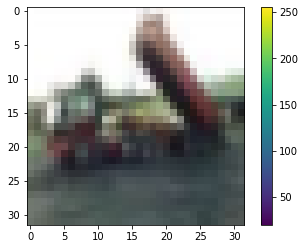

In [87]:
# Cell #3
# 3.	Inspect the third image in the train set
pyplot.figure()
pyplot.imshow(X_train[2])
pyplot.colorbar()
pyplot.grid(False)
pyplot.show()

In [88]:
# Cell #4
# 4.1 Normalize pixel data
X_train, X_test = normalize_pixels(X_train, X_test)

In [89]:
# Cell #5
# 4.2 Set aside a validation set that has 5000 images from the original training set
X_valid, X_train = X_train[:5000], X_train[5000:]
Y_valid, Y_train = Y_train[:5000], Y_train[5000:]

In [90]:
# Cell #6
# Class name definition
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


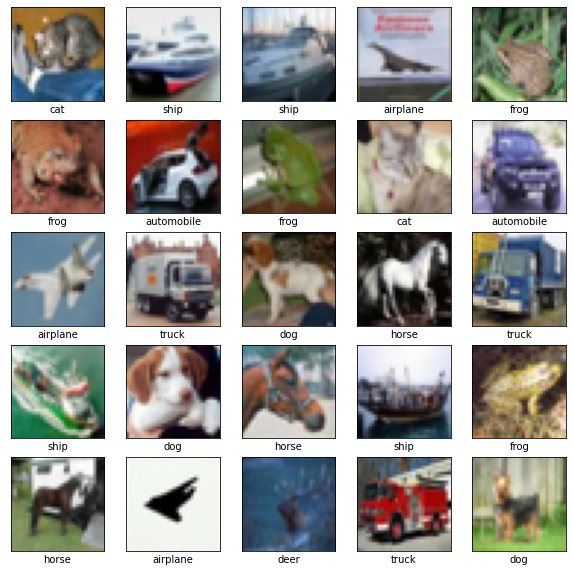

In [91]:
# Cell #7
# Display the first 25 images from X_test
# Display the first 25 images from X_test
pyplot.figure(figsize=(10,10))
for i in range(25):
    pyplot.subplot(5,5,i+1)
    pyplot.xticks([])
    pyplot.yticks([])
    pyplot.grid(False)
    pyplot.imshow(X_test[i])
    result = np.where(Y_test[i,:] == np.amax(Y_test[i,:]))
    pyplot.xlabel(class_names[int(Y_test[i, result])])
pyplot.show()

In [92]:
# Cell #8
# define model
model = define_model()
# one hot encode outputs
Y_test_NonC = Y_test
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
# train model
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))
# evaluate model
_, acc = model.evaluate(X_test, Y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

Epoch 1/10
1407/1407 [==============================] - 66s 46ms/step - loss: 1.6821 - accuracy: 0.4303 - val_loss: 1.1047 - val_accuracy: 0.6068
Epoch 2/10
1407/1407 [==============================] - 66s 47ms/step - loss: 1.0215 - accuracy: 0.6401 - val_loss: 0.9731 - val_accuracy: 0.6605
Epoch 3/10
1407/1407 [==============================] - 70s 50ms/step - loss: 0.8399 - accuracy: 0.7085 - val_loss: 0.9540 - val_accuracy: 0.6723
Epoch 4/10
1407/1407 [==============================] - 69s 49ms/step - loss: 0.6961 - accuracy: 0.7582 - val_loss: 0.9771 - val_accuracy: 0.6692
Epoch 5/10
1407/1407 [==============================] - 69s 49ms/step - loss: 0.5568 - accuracy: 0.8051 - val_loss: 1.0269 - val_accuracy: 0.6684
Epoch 6/10
1407/1407 [==============================] - 70s 50ms/step - loss: 0.4621 - accuracy: 0.8362 - val_loss: 1.0440 - val_accuracy: 0.6738
Epoch 7/10
1407/1407 [==============================] - 71s 50ms/step - loss: 0.3715 - accuracy: 0.8719 - val_loss: 1.1047 -

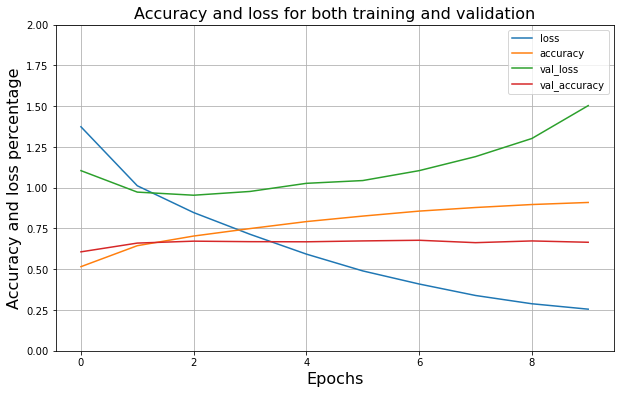

In [93]:
# Cell #9
#learning curves
summarize_diagnostics(history)
validation_graph(history)

In [94]:
# Cell #10
# 10.	Evaluate the accuracy of the test set
test_loss, test_acc = model.evaluate(X_test,  Y_test)
print('Test accuracy:', test_acc)
X_new = X_test[:5]
y_proba = model.predict(X_new)
y_proba.round(2)
result = np.argmax(model.predict(X_new), axis=-1)
y_pred = []
for i in range(5):
    y_pred.append(class_names[int(result[i])])
print('Predicted Classes:',y_pred)
y_real=[]
for i in range(5):
    result = np.where(Y_test_NonC[i,:] == np.amax(Y_test_NonC[i,:]))
    y_real.append(class_names[int(Y_test_NonC[i, result])])
print('True Classes: ', y_real)

313/313 [==============================] - 3s 9ms/step - loss: 1.5034 - accuracy: 0.6655
Test accuracy: 0.6654999852180481
Predicted Classes: ['cat', 'ship', 'airplane', 'airplane', 'deer']
True Classes:  ['cat', 'ship', 'ship', 'airplane', 'frog']
